# Encoders
https://medium.com/edureka/autoencoders-tutorial-cfdcebdefe37  
https://medium.com/activating-robotic-minds/how-to-reduce-image-noises-by-autoencoder-65d5e6de543   
https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484
video about dimensionality reduction
video about autoencoders



In [2]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [3]:
# this is the size of our encoded representations
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
 
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
# configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [4]:
# function to add some noise to images

def add_noise(x, noise_factor=0.3):
    x = x + np.random.randn(*x.shape) * noise_factor
    x = x.clip(0., 1.)
    return x

In [10]:
(x_train, _), (x_test, _) = mnist.load_data()
print(x_train.shape)
#print(" mnist.load_data()",  mnist.load_data())
# normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
(x_train) = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
x_train = add_noise(x_train)
x_test  = add_noise(x_test)

print(x_train.shape)


(60000, 28, 28)
(60000, 28, 28)
(60000, 784)
(60000, 784)


In [6]:
# train the autoencoder

autoencoder.fit(x_train, x_train,  # input and output are the same
epochs=50,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.5264 - val_loss: 0.4868
Epoch 2/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.4852 - val_loss: 0.4838
Epoch 3/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.4817 - val_loss: 0.4795
Epoch 4/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.4765 - val_loss: 0.4734
Epoch 5/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.4702 - val_loss: 0.4668
Epoch 6/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.4639 - val_loss: 0.4607
Epoch 7/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.4584 - val_loss: 0.4557
Epoch 8/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.4540 - val_loss: 0.4518
Epoch 9/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.4506 - val_loss: 0.4488
Epoch

In [232]:
# encode and decode some digits from the test set

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

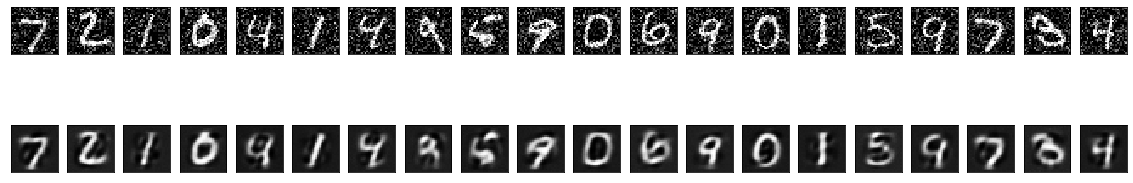

In [233]:
n = 20 # how many digits we will display
plt.figure(figsize=(20, 4))


# draw the original images

for i in range(n):
# display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
   
    
# draw the reconstructed outputs

for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# draw the encoded images (latent space)
# these are very small (4x8 pixels)


for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    b = plt.imshow(encoded_imgs[i,:].reshape(4,8)) # reshaping the 32 latent values.
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
 


In [234]:
encoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [112]:
# simple ways to access weights and data in/out

#layer.input
#layer.output
#layer.input_shape
#layer.output_shape

#layer.get_input_at(node_index)
#layer.get_output_at(node_index)
#layer.get_input_shape_at(node_index)
#layer.get_output_shape_at(node_index)

In [184]:
decoded_imgs = decoder.predict(encoded_imgs)

In [189]:
decoded_imgs.shape

(10000, 784)

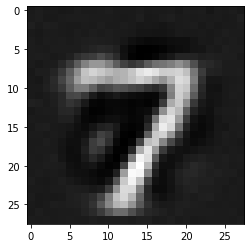

In [187]:
plt.imshow(decoded_imgs[0].reshape(28, 28))

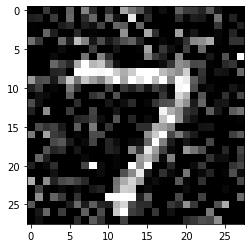

In [190]:
plt.imshow(x_test[0].reshape(28, 28))

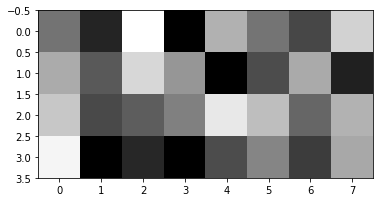

In [207]:
plt.imshow(encoded_imgs[0,:].reshape(4,8))